X = [2.], Y = [0.75]
X = [2.], Y = [0.75]
X = [2.00000001], Y = [0.75000001]
X = [0.99999999], Y = [0.75000001]
X = [1.5], Y = [0.5]
X = [1.5], Y = [0.5]
X = [1.50000001], Y = [0.5]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Minima found at:
X = [1.5], Y = 0.5
X = [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2
 2.3 2.4 2.5], Y = [1.5  1.31 1.14 0.99 0.86 0.75 0.66 0.59 0.54 0.51 0.5  0.51 0.54 0.59
 0.66 0.75 0.86 0.99 1.14 1.31 1.5 ]


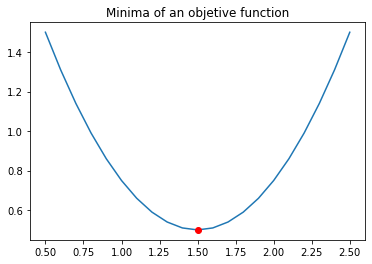

In [2]:
"""Minimize an objetive function, using SciPy"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def f(X):
  """Given a scalar X, return some value (a real number)."""
  Y = (X - 1.5)**2 + 0.5
  print("X = {}, Y = {}".format(X, Y)) # for tracing
  return Y

def test_run():
  Xguess = 2.0
  min_result = spo.minimize(f, Xguess, method='SLSQP', options={'disp': True})
  print("Minima found at:")
  print("X = {}, Y = {}".format(min_result.x, min_result.fun))

  # Plot function values, mark minima
  Xplot = np.linspace(0.5, 2.5, 21)
  Yplot = f(Xplot)
  plt.plot(Xplot, Yplot)
  plt.plot(min_result.x, min_result.fun, 'ro')
  plt.title("Minima of an objetive function")
  plt.show()

if __name__ == "__main__":
  test_run()

## 9.- Fit a line to given data points

In [ ]:
"""Fit a line to a given set of data points using optimization."""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error(line, data):
  """Compute error between given line model and observed data.
  
  Parameters
  ----------
  line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
  data: 2D array where each row is a point (x, y)
  
  Returns error as a single real value.
  """

  # Metric: Sum of squared Y-axis differences
  err = np.sum((data[:, 1] - (line[0] * data[:, 0] + line[1])) ** 2)
  return err

## 10.- Optimizers for polinomials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

def error(line, data):
    """Compute error between given line model and observed data.
    Parameters
    ----------
    line: tuple/list/array (C0, C1) where C0 is slope and C1 is Y-intercept
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    c0 = line[0]
    c1 = line[1]
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - (c0 * x + c1)) ** 2)
    return err


def fit_line(data, error_func):
    """Fit a line to given data, using a supplied error function.

    Parameters
    ----------
    data: 2D array where each row is a point (X0, Y)
    error_func: funciton that computes the error between a line and observed data

    Returns line that minimizes the error function.
    """
    # Generate initial guess for line model
    line = np.float32([0, np.mean(data[:, 1])]) # slope = 0, intercept = mean(y values)

    # Plot initial guess (optional)
    x_ends = np.float32([-5, 5])
    plt.plot(x_ends, line[0] * x_ends + line[1], 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # args: pass the data as argument to error_func
    result = spo.minimize(error_func, line, args=(data,), method='SLSQP', options={'disp':True})
    return result.x

def error_poly(C, data):
    """Compute error between given polynomial and observed data.

    Parameters
    ----------
    C(Coefficients for the polynomial): numpy.poly1d object or equivalent array representing polynomial coefficients
    data: 2D array where each row is a point (x, y)

    Returns error as a single real value.
    """
    # Metric: Sum of squared Y-axis differences
    # np.polyval(): Evaluate a polynomial at specific values.
    # for example, np.polyval([3,0,1], 5) ==> 3 * 5**2 + 0 * 5**1 + 1 ==> 76
    x = data[:, 0]
    y = data[:, 1]
    err = np.sum((y - np.polyval(C, x)) ** 2)
    return err

def fit_poly(data, error_func, degree=4):
    """Fit a polynomial to given data, using supplied error function.
    
    Parameters
    ----------
    data: 2D array where each row is a point (x, y)
    error_func: function that computes the error between a polynomial and observed difference

    Returns polynomial that minimizes the error funciton.
    """
    # Generate initial guess for polynomial model (all coeffs = 1)
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    Cguess = np.poly1d(np.ones(degree + 1, dtype=np.float32))

    # Plot initial guess (optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label='Initial guess')

    # Call optimizer to minimize error function
    # Sequential Least SQuares Programming (SLSQP).
    result = spo.minimize(error_func, Cguess, args=(data,), method='SLSQP', options={'disp':True})
    # for example, np.poly1d([1, 2, 3]) ==> 1x**2 + 2x + 3
    return np.poly1d(result.x) # convert optimal result into a poly1d object and return the result


Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 135.56264479923328
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line: C0 = 3.7989981349270323, C1 = 2.3088891007339885


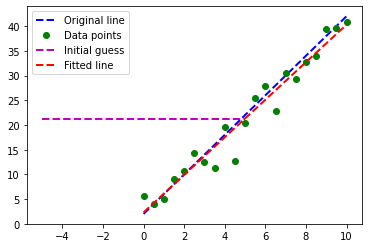

In [2]:
# Define original ine
l_orig = np.float32([4, 2])
c0, c1 = l_orig[0], l_orig[1]
print('Original line: C0 = {}, C1 = {}'.format(c0, c1))
# Xorig = [0., 0.5, 1., ..., 10.]
Xorig = np.linspace(0, 10, 21)
# Yorig = [2., 4., 6., ..., 42.]
Yorig = c0 * Xorig + c1
plt.plot(Xorig, Yorig, 'b--', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
# Draw random samples from a normal (Gaussian) distribution.
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
l_fit = fit_line(data, error)
fit_c0, fit_c1 = l_fit[0], l_fit[1]
print('Fitted line: C0 = {}, C1 = {}'.format(fit_c0, fit_c1))
plt.plot(x, fit_c0 * x + fit_c1, 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper left')
plt.show()

     4      3     2
1.5 x - 10 x - 5 x + 60 x + 50
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 253.75500821456015
            Iterations: 8
            Function evaluations: 74
            Gradient evaluations: 8
     4         3         2
1.5 x - 10.01 x - 4.992 x + 60.14 x + 49.47


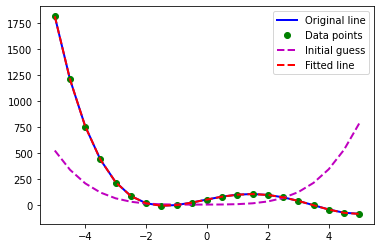

In [3]:
# Fitting Higher Order Polynomials
Cguess = np.poly1d([1.5, -10, -5, 60, 50])
print(Cguess)
Xorig = np.linspace(-5, 5, 21)
Yorig = np.polyval(Cguess, Xorig)
plt.plot(Xorig, Yorig, 'b', linewidth=2.0, label='Original line')

# Generate noisy data points
noise_sigma = 3.0
noise = np.random.normal(0, noise_sigma, Yorig.shape)
data = np.asarray([Xorig, Yorig + noise]).T
x, y = data[:, 0], data[:, 1]
plt.plot(x, y, 'go', label='Data points')

# Try to fit a line to this data
fit_coef = fit_poly(data, error_poly)
print(fit_coef)
plt.plot(x, np.polyval(fit_coef, x), 'r--', linewidth=2.0, label='Fitted line')

# Add a legend and show plot
plt.legend(loc='upper right')
plt.show()